In [21]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as pp
import matplotlib
%matplotlib inline

In [116]:
def save(name, data):
    print "save", name, ":", data
    with open(name, 'w') as f:
        f.write(data)
    
def data_target(csv):
    return csv.ix[:, 1:], csv.ix[:, 0]

In [117]:
data_prices = pd.read_csv('close_prices.csv')
prices, _ = data_target(data_prices)
prices.head()

,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
0,76.440002,117.510002,85.029999,24.270000,125.519997,59.409999,64.750000,24.280001,165.250000,75.910004,...,28.799999,79.279999,34.220001,86.379997,71.820000,109.419998,196.240005,47.980000,76.419998,87.750000
1,76.070000,119.000000,85.110001,24.139999,124.489998,59.319997,64.320000,24.320000,162.970001,76.040001,...,28.709999,78.620003,34.090000,85.870003,72.320000,110.000000,193.339996,47.270000,75.750000,87.360001
2,75.989998,118.510002,84.500000,24.430000,124.070000,59.319997,64.449997,24.230000,162.309998,75.519997,...,28.490000,77.720001,34.049999,85.980003,71.980003,109.260002,191.559998,46.950001,74.650002,87.139999
3,76.320000,119.379997,84.199997,23.770000,123.489998,59.509996,65.239998,24.250000,162.289993,76.070000,...,28.520000,78.050003,34.230000,85.830002,72.160004,109.660004,193.559998,47.669998,74.620003,87.070000
4,75.889999,118.739998,83.800003,23.330000,122.639999,59.009995,65.190002,24.049999,159.850006,75.959999,...,28.879999,77.209999,33.980000,85.410004,71.989998,109.360001,193.050003,47.000000,74.360001,86.900002


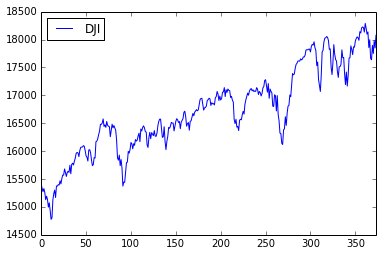

In [118]:
dj = pd.read_csv('djia_index.csv')
dj.plot()

In [119]:
pca = PCA(n_components = 10)
pca.fit(prices)

PCA(copy=True, n_components=10, whiten=False)

[0, 15, 0, 1]

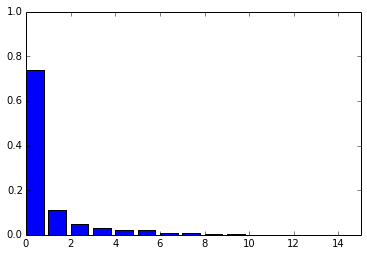

In [120]:
VR = pca.explained_variance_ratio_
pp.bar(np.arange(len(VR)), VR)
pp.axis([0, 15, 0, 1])

In [130]:
vr_sum = 0
for i in range(len(VR)):
    vr_sum += VR[i]
    print "%i %.3f %f" % (i, vr_sum, VR[i])
    if vr_sum >= .9:
        save("2_1", str(i+1))
        break

0 0.739 0.738971
1 0.849 0.110072
2 0.899 0.049951
3 0.928 0.028749
save 2_1 : 4


In [129]:
prices_pca = pca.transform(prices)
C = np.corrcoef(prices_pca[:, 0], dj.DJI)
save("2_2", "%.2f" % (C[0,1]))

save 2_2 : 0.91


In [95]:
index = pca.components_[0].argmax()
save("2_3", prices.axes[1][index])

save 2_3 : V
